# Maximum population growth rate ($r_m$) calculations

In [3]:
###### Population growth rate (r_m) calculations #######

rm(list=ls())
graphics.off()

require('tidyverse')
require('patchwork')
require('forcats')
require('car')
require('ggplot2')
require('cowplot')

In [4]:
# Read in the trait data

alpha <- as_tibble(read.csv('../data/AlphaPredictions.csv')) %>% 
         select(species, temp, alpha, alphaLwr, alphaUpr) %>%
         mutate(curve_ID = case_when(species == 'Anoplophora glabripennis' ~ '1',
                              species == 'Halyomorpha halys' ~ '2',       
                              species == 'Aedes aegypti' ~ '3',
                              species == 'Anthonomus grandis' ~ '4',
                              species == 'Paracoccus marginatus' ~ '5',
                              species == 'Acyrthosiphon pisum' ~ '6',
                              species == 'Aphis gossypii' ~ '7',
                              species == 'Bemisia tabaci' ~ '8',
                              species == 'Tetraneura nigriabdominalis' ~ '9',
                              species == 'Stethorus punctillum' ~ '10',
                              species == 'Tetranychus mcdanieli' ~ '11',
                              species == 'Muscidifurax zaraptor' ~ '12',
                              species == 'Aphis nasturtii' ~ '13',
                              species == 'Rhopalosiphum maidis' ~ '14',
                              species == 'Thrips hawaiiensis' ~ '15',
                              species == 'Helicoverpa armigera' ~ '16')) %>%
                              filter(curve_ID != 'NA')
                  
species <- alpha %>% distinct(species) %>% print(n=50)  

# A tibble: 16 × 1
   species                    
   <chr>                      
 1 Bemisia tabaci             
 2 Tetraneura nigriabdominalis
 3 Stethorus punctillum       
 4 Tetranychus mcdanieli      
 5 Muscidifurax zaraptor      
 6 Aphis nasturtii            
 7 Rhopalosiphum maidis       
 8 Aedes aegypti              
 9 Anoplophora glabripennis   
10 Anthonomus grandis         
11 Helicoverpa armigera       
12 Paracoccus marginatus      
13 Halyomorpha halys          
14 Thrips hawaiiensis         
15 Acyrthosiphon pisum        
16 Aphis gossypii             


In [5]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
zj <- as_tibble(read.csv('../data/ZetaJPredictions.csv')) %>% 
         select(species, temp, zj, zjLwr, zjUpr) %>%
         mutate(curve_ID = case_when(species == 'Anoplophora glabripennis' ~ '1',
                              species == 'Halyomorpha halys' ~ '2',       
                              species == 'Aedes aegypti' ~ '3',
                              species == 'Anthonomus grandis' ~ '4',
                              species == 'Paracoccus marginatus' ~ '5',
                              species == 'Acyrthosiphon pisum' ~ '6',
                              species == 'Aphis gossypii' ~ '7',
                              species == 'Bemisia tabaci' ~ '8',
                              species == 'Tetraneura nigriabdominalis' ~ '9',
                              species == 'Stethorus punctillum' ~ '10',
                              species == 'Tetranychus mcdanieli' ~ '11',
                              species == 'Muscidifurax zaraptor' ~ '12',
                              species == 'Aphis nasturtii' ~ '13',
                              species == 'Rhopalosiphum maidis' ~ '14',
                              species == 'Thrips hawaiiensis' ~ '15',
                              species == 'Helicoverpa armigera' ~ '16')) %>%
                              filter(curve_ID != 'NA') %>%
                              arrange(curve_ID) %>% 
                              mutate(temp = as.numeric(temp)) %>%
                              rename(zjspecies = species, zjtemp = temp, zjcurve_ID = curve_ID)

In [6]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
z     <- as_tibble(read.csv('../data/ZetaPredictions.csv'))  %>% 
         select(species, temp, z, zLwr, zUpr) %>%
         mutate(curve_ID = case_when(species == 'Anoplophora glabripennis' ~ '1',
                              species == 'Halyomorpha halys' ~ '2',       
                              species == 'Aedes aegypti' ~ '3',
                              species == 'Anthonomus grandis' ~ '4',
                              species == 'Paracoccus marginatus' ~ '5',
                              species == 'Acyrthosiphon pisum' ~ '6',
                              species == 'Aphis gossypii' ~ '7',
                              species == 'Bemisia tabaci' ~ '8',
                              species == 'Tetraneura nigriabdominalis' ~ '9',
                              species == 'Stethorus punctillum' ~ '10',
                              species == 'Tetranychus mcdanieli' ~ '11',
                              species == 'Muscidifurax zaraptor' ~ '12',
                              species == 'Aphis nasturtii' ~ '13',
                              species == 'Rhopalosiphum maidis' ~ '14',
                              species == 'Thrips hawaiiensis' ~ '15',
                              species == 'Helicoverpa armigera' ~ '16')) %>%
  filter(curve_ID != 'NA') %>%
  arrange(curve_ID) %>% mutate(temp = as.numeric(temp)) %>%
  rename(zspecies = species, ztemp = temp, zcurve_ID = curve_ID)

In [7]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
bmax <- as_tibble(read.csv('../data/BetaPredictions.csv'))  %>% 
  select(species, temp, bmax, bmaxLwr, bmaxUpr) %>%
  mutate(curve_ID = case_when(species == 'Anoplophora glabripennis' ~ '1',
                              species == 'Halyomorpha halys' ~ '2',       
                              species == 'Aedes aegypti' ~ '3',
                              species == 'Anthonomus grandis' ~ '4',
                              species == 'Paracoccus marginatus' ~ '5',
                              species == 'Acyrthosiphon pisum' ~ '6',
                              species == 'Aphis gossypii' ~ '7',
                              species == 'Bemisia tabaci' ~ '8',
                              species == 'Tetraneura nigriabdominalis' ~ '9',
                              species == 'Stethorus punctillum' ~ '10',
                              species == 'Tetranychus mcdanieli' ~ '11',
                              species == 'Muscidifurax zaraptor' ~ '12',
                              species == 'Aphis nasturtii' ~ '13',
                              species == 'Rhopalosiphum maidis' ~ '14',
                              species == 'Thrips hawaiiensis' ~ '15',
                              species == 'Helicoverpa armigera' ~ '16')) %>%
  filter(curve_ID != 'NA') %>%
  arrange(curve_ID) %>% mutate(temp = as.numeric(temp)) %>%
  rename(bmaxspecies = species, bmaxtemp = temp, bmaxcurve_ID = curve_ID) %>%
  filter(bmaxspecies != 'NA')

In [8]:
df <- bind_cols(alpha, zj, z, bmax) %>% 
      select(curve_ID, species, temp, alpha, alphaLwr, alphaUpr,
             zj, zjLwr, zjUpr, z, zLwr, zUpr, bmax, bmaxLwr, bmaxUpr) %>%
      mutate(kappa = 0.01)

In [9]:
#---------------------------------- Define parameters -------------------------------#

zj    <- df$zj
alpha <- df$alpha
z     <- df$z
bpk   <- df$bmax
k     <- df$kappa

# Calculate rmax
df <- df %>% mutate(rm_opt = (((k+z)*((log(bmax/(k+z)))-(alpha*zj)))/(alpha*(k+z)+1)))

# lower
zj_lwr    <- df$zjLwr
alpha_lwr <- df$alphaLwr
z_lwr     <- df$zLwr
bmax_lwr  <- df$bmaxLwr
k         <- df$kappa

df <- df %>% mutate(rm_optLwr = (((k+z_lwr)*((log(bmax_lwr/(k+z_lwr)))-(alpha_lwr*zj_lwr)))/(alpha_lwr*(k+z_lwr)+1)))

# upper 
zj_upr    <- df$zjUpr
alpha_upr <- df$alphaUpr
z_upr     <- df$zUpr
bmax_upr  <- df$bmaxUpr
k         <- df$kappa

df <- df %>% mutate(rm_optUpr = (((k+z_upr)*((log(bmax_upr/(k+z_upr)))-(alpha_upr*zj_upr)))/(alpha_upr*(k+z_upr)+1)))

write_csv(df, '../results/r_mCalcs.csv')

In [10]:
# truncate data for plotting 

rmData <- df %>%
  mutate_at(vars(c(rm_opt)), 
            ~ifelse(rm_opt < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optLwr)), 
            ~ifelse(rm_optLwr < -0.001, -0.001, .)) %>%
  mutate_at(vars(c(rm_optUpr)), 
            ~ifelse(rm_optUpr < -0.001, -0.001, .)) %>%
  filter(rm_opt > -0.001)

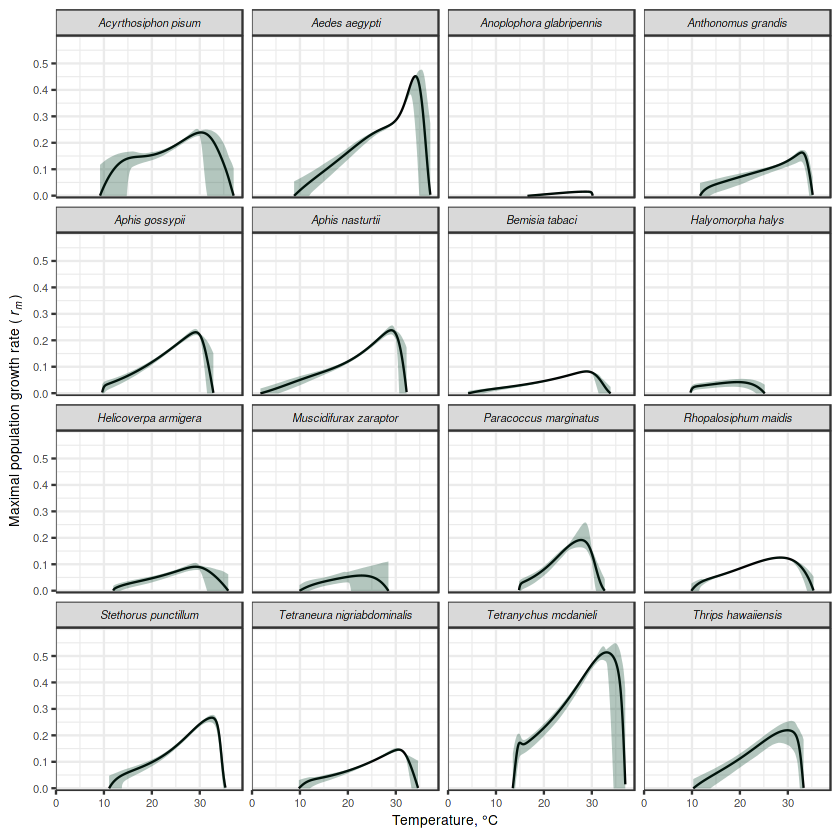

In [11]:
# plot r_m TPCs

rmPlot <- ggplot()+
  geom_line(aes(temp, rm_opt), rmData)+
  facet_wrap(~species, ncol = 4)+
  scale_y_continuous(expression(plain(paste(" Maximal population growth rate ("~italic(r[m])~")"))),
                     limits=c(-0.001,0.6),
                     expand = c(0.01, 0),
                     breaks=seq(0,0.5, by=0.1))+
  theme_bw()+
  geom_ribbon(aes(temp, ymin=rm_optLwr, ymax=rm_optUpr), rmData, fill="#004225",alpha=0.3)+
  theme(text = element_text(size=8))+theme(strip.text = element_text(face = "italic"))+
  labs(x=expression(plain(paste(" Temperature, ",degree,"C"))))+
  theme(legend.position = 'none')

rmPlot

In [12]:
save_plot(rmPlot, file="../results/rmTPCs.pdf", 
          base_height=15, base_width = 17.5, base_asp = 1, units="cm")

In [13]:
#=======================================================================
# plot mass corrected value of r_m at Topt against the peak temperature for r_m

bodyMass <- as_tibble(read.csv('../data/sizeMeans.csv')) %>% 
  rename(species = interactor1) %>% 
  mutate(curve_ID = case_when(species == 'Anoplophora glabripennis' ~ '1',
                              species == 'Halyomorpha halys' ~ '2',       
                              species == 'Aedes aegypti' ~ '3',
                              species == 'Anthonomus grandis' ~ '4',
                              species == 'Paracoccus marginatus' ~ '5',
                              species == 'Acyrthosiphon pisum' ~ '6',
                              species == 'Aphis gossypii' ~ '7',
                              species == 'Bemisia tabaci' ~ '8',
                              species == 'Tetraneura nigriabdominalis' ~ '9',
                              species == 'Stethorus punctillum' ~ '10',
                              species == 'Tetranychus mcdanieli' ~ '11',
                              species == 'Muscidifurax zaraptor' ~ '12',
                              species == 'Aphis nasturtii' ~ '13',
                              species == 'Rhopalosiphum maidis' ~ '14',
                              species == 'Thrips hawaiiensis' ~ '15',
                              species == 'Helicoverpa armigera' ~ '16')) %>%
  rename(massspecies = species, masscurve_ID = curve_ID) %>% 
  filter(masscurve_ID != 'NA') %>% arrange(masscurve_ID)

In [14]:
rmMass <- df %>% group_by(species) %>% slice(which.max(rm_opt)) %>%
  select(curve_ID, species, temp, rm_opt, rm_optLwr, rm_optUpr,) %>%
  arrange(curve_ID) 

bodyMass <- bodyMass %>% select(avg, masscurve_ID)

rm_data <- bind_cols(rmMass, bodyMass) %>% rename(mass = avg, rmTpk = temp) %>% select(-masscurve_ID)

write_csv(rm_data, '../results/rm_optSizeScaling.csv')

In [15]:
#===================================================
# mass-corrected r_m opt vs r_m Tpks

rm_data$kT <- 1/(8.617333262145 * 10^-5 * (rm_data$rmTpk+273.15))
head(rm_data)


curve_ID,species,rmTpk,rm_opt,rm_optLwr,rm_optUpr,mass,kT
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anoplophora glabripennis,28.64865,0.01510336,0.0115713,0.01719946,159.8000000,38.45119
10,Stethorus punctillum,32.47748,0.26677117,0.2486943,0.27684512,0.4800000,37.96949
11,Tetranychus mcdanieli,33.10811,0.51367500,0.4727377,0.52546725,0.0243000,37.89130
12,Muscidifurax zaraptor,22.83784,0.05732966,-14.9437508,0.08514682,0.8950000,39.20606
13,Aphis nasturtii,29.05405,0.23802002,0.2222934,0.25571627,0.8673000,38.39961
14,Rhopalosiphum maidis,28.46847,0.12522888,0.1278068,0.12184787,0.2995714,38.47416


`geom_smooth()` using formula 'y ~ x'



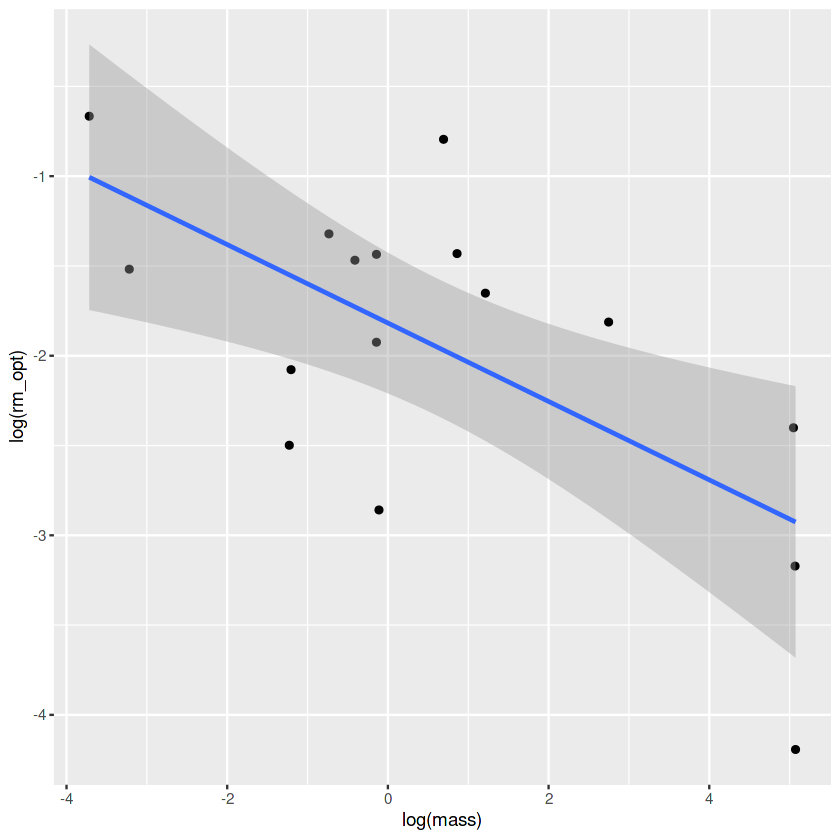

In [16]:
#plot uncorrected data in log-log scale
rm_data %>%
  ggplot(aes(x=log(mass), y = log(rm_opt)))+
  geom_point()+
  geom_smooth(method = 'lm')


`geom_smooth()` using formula 'y ~ x'



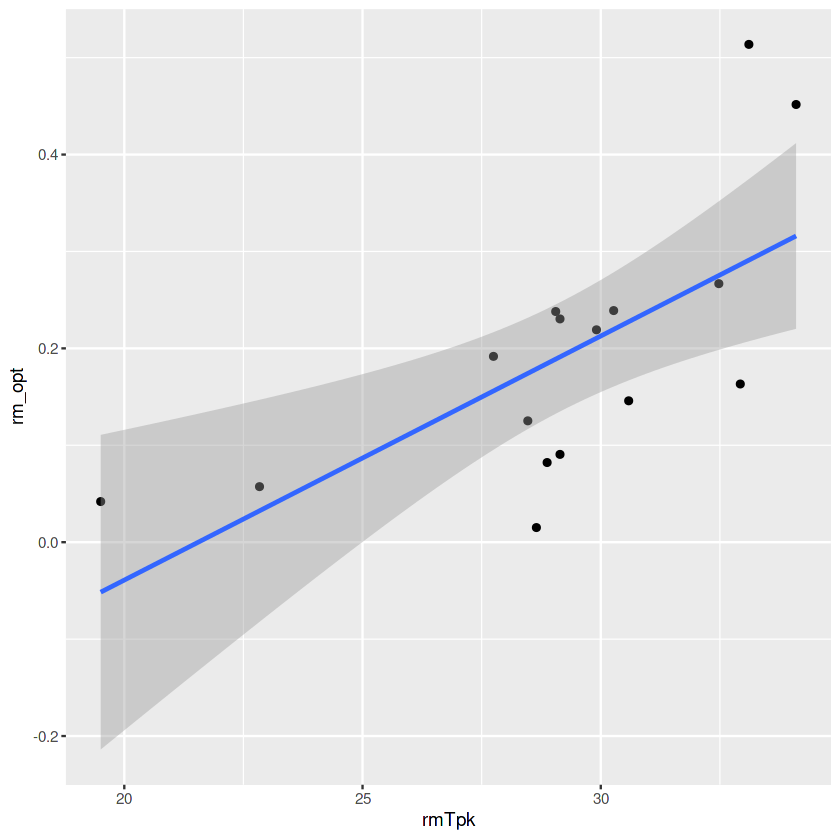

In [17]:
#plot rm_opt vs T
rm_data %>%
  ggplot(aes(x = rmTpk, y = rm_opt)) +
  geom_point()+
  geom_smooth(method = 'lm')

In [18]:
# linear model (note the allometry is linear in log-log scale)
rm_model <- lm(log(rm_opt) ~ log(mass) + kT, data = rm_data)
summary(rm_model)
coef(rm_model)

cf <-  confint(rm_model,level = .95)
anova(rm_model)



Call:
lm(formula = log(rm_opt) ~ log(mass) + kT, data = rm_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4796 -0.2692  0.1033  0.4119  0.6153 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 32.42463   13.62979   2.379   0.0334 *
log(mass)   -0.15841    0.06281  -2.522   0.0255 *
kT          -0.89293    0.35540  -2.512   0.0260 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6066 on 13 degrees of freedom
Multiple R-squared:  0.6114,	Adjusted R-squared:  0.5516 
F-statistic: 10.22 on 2 and 13 DF,  p-value: 0.002148


(Intercept)   log(mass)          kT 
 32.4246261  -0.1584063  -0.8929265

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(mass),1,5.201958,5.2019582,14.137038,0.002382064
kT,1,2.322824,2.3228239,6.312594,0.025969712
Residuals,13,4.783566,0.3679666,NA,NA


Warning message in log(rm_optLwr/mass^cf[2]):
“NaNs produced”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


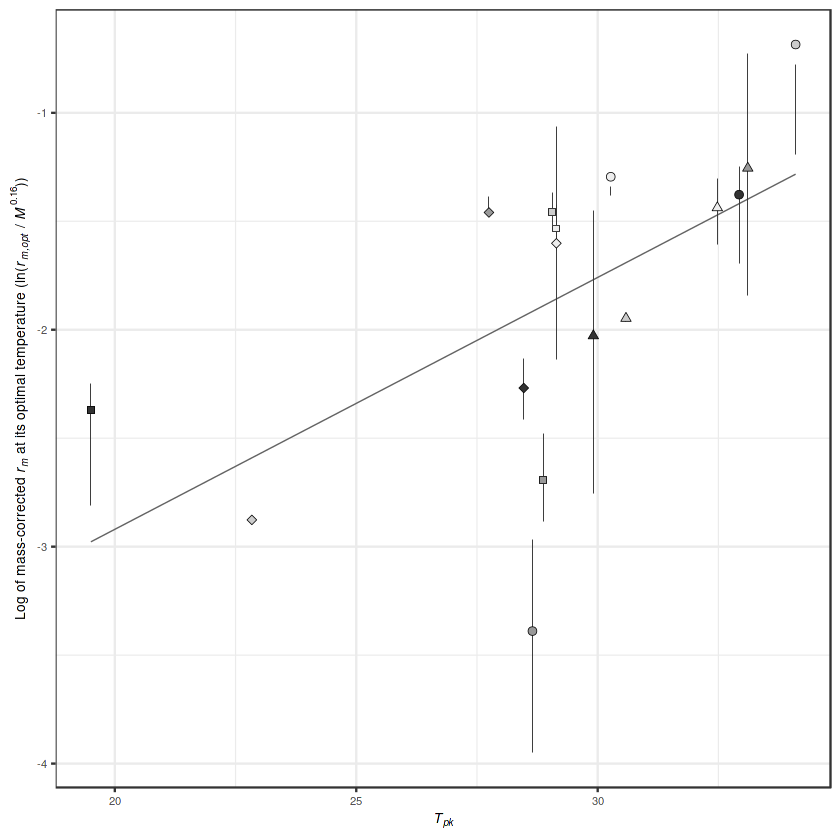

In [19]:
#plot rm_opt in 1/kT, correcting for mass
MassCorrectedrm_opt <- 
rm_data %>%
  ggplot(aes(x = rmTpk, y = log(rm_opt/mass^coef(rm_model)[2]))) +
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill=NA)+
  scale_y_continuous(expression(plain(paste("Log of mass-corrected ",italic(r[m])," at its optimal temperature (ln(",italic(r[paste(m,",", opt)])," / ",italic(M^-0.16),"))"))))+
  scale_x_continuous(expression(plain(paste(italic("T"[pk])))))+
  geom_linerange(aes(x=rmTpk, 
                     ymin=log(rm_optLwr/mass^cf[2]), 
                     ymax=log(rm_optUpr/mass^cf[2,2]), colour=species), size=0.2)+
  geom_point(aes(shape = species, fill = species), size=2,stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=8,ncol=2,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=8,ncol=2,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  theme_bw()+
  theme(text = element_text(size=8),
        legend.position = 'none',
        legend.text = element_text(size = 4.5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.2, 'cm'))

MassCorrectedrm_opt

In [20]:
save_plot(MassCorrectedrm_opt, file="../results/MassCorrectedrm_opt_Tpk.pdf", 
          base_height=11,base_width = 10, base_asp = 0.75,units="cm")

Warning message in log(rm_optLwr/mass^cf[2]):
“NaNs produced”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


In [21]:
#=======================================================
# sum of trait Tpks versus mass corrected r_m, opt

Species <- rm_data$species

alphaTpks <- as_tibble(read.csv('../data/alpha_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), conf_upper = as.numeric(conf_upper))

zjTpks <- as_tibble(read.csv('../data/zj_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


zTpks <- as_tibble(read.csv('../data/z_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))

bmaxTpks <- as_tibble(read.csv('../data/bmax_Tpks_AllParams.csv')) %>% 
  filter(param=='topt') %>%
  filter(species %in% Species)%>%
  select(param,species,estimate, conf_lower, conf_upper,trait) %>%
  mutate(estimate = as.numeric(estimate), 
         conf_lower = as.numeric(conf_lower), 
         conf_upper = as.numeric(conf_upper))


In [22]:
AllTpks <- bind_rows(alphaTpks,zjTpks,zTpks,bmaxTpks)

head(AllTpks)

param,species,estimate,conf_lower,conf_upper,trait
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
topt,Bemisia tabaci,29.751,29.33872,30.66100,juvenile development rate
topt,Tetraneura nigriabdominalis,30.648,30.50557,30.75143,juvenile development rate
topt,Stethorus punctillum,32.875,32.77005,33.01580,juvenile development rate
topt,Tetranychus mcdanieli,35.182,34.93494,35.79288,juvenile development rate
topt,Muscidifurax zaraptor,32.038,31.82976,32.45753,juvenile development rate
topt,Aphis nasturtii,30.874,29.73374,31.69951,juvenile development rate


In [23]:
write_csv(AllTpks, '../results/AllTpkParams.csv')

In [24]:
#Calculate variance and Sum

OptVar <- AllTpks %>% group_by(species) %>%
  summarise(variance = var(estimate))
OptSum <- AllTpks %>% group_by(species) %>%
  summarise(sum = sum(estimate))

SumPlot <- left_join(rm_data, OptSum) 

SumPlot[4,5] <- 0.0573

Joining, by = "species"


`geom_smooth()` using formula 'y ~ x'



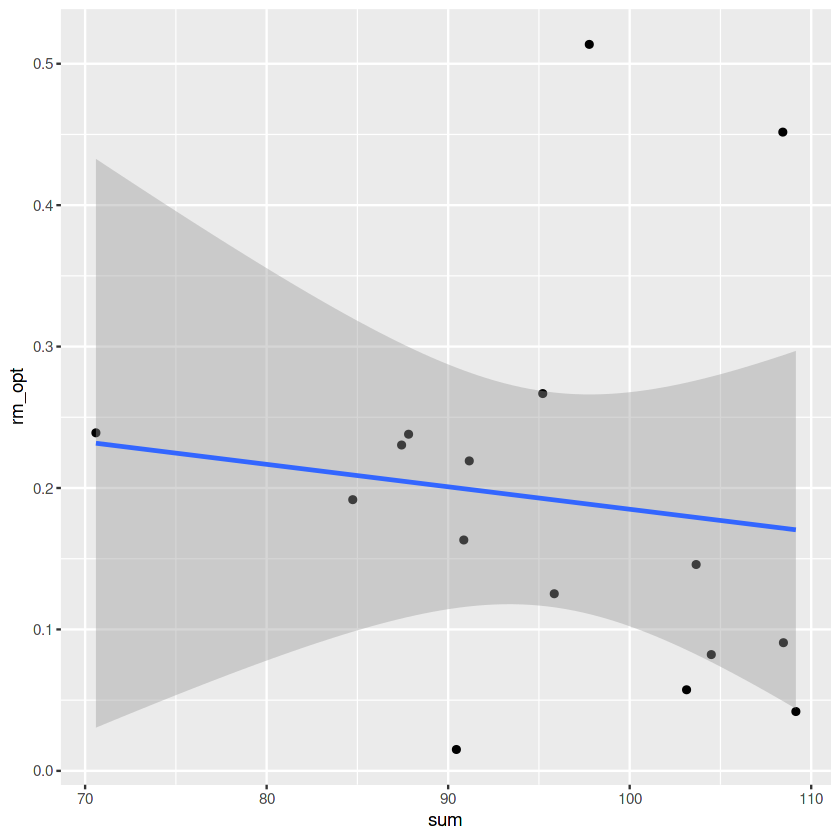

In [25]:
#plot rm_opt vs Sum of Tpks
SumPlot %>%
  ggplot(aes(x=sum, y = rm_opt))+
  geom_point()+
  geom_smooth(method = 'lm')

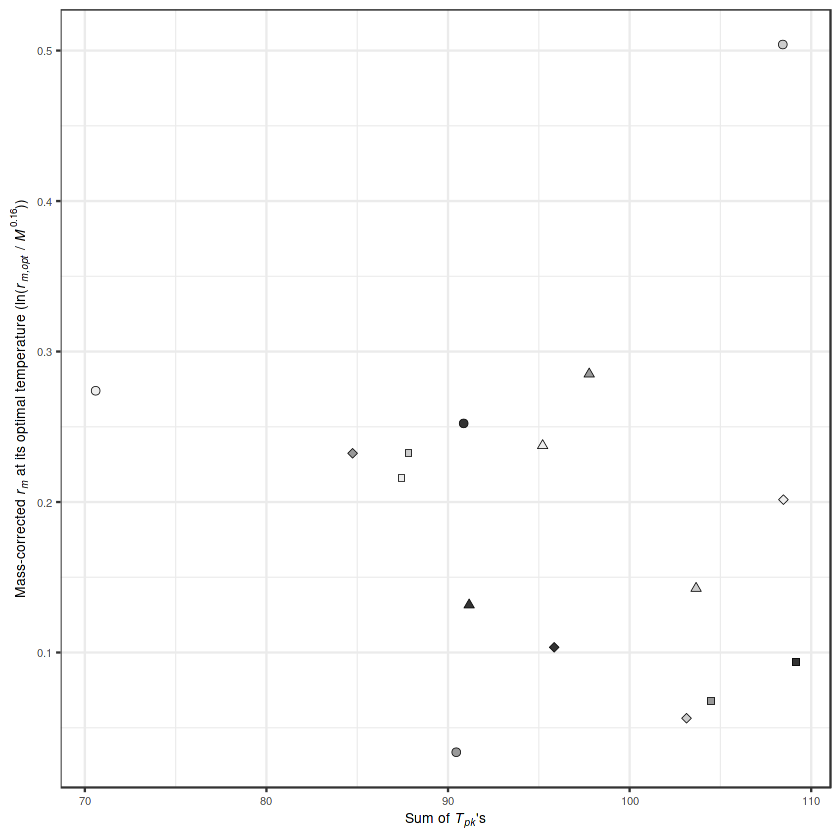

In [26]:
SumTpks_plot <-
  SumPlot %>%
  ggplot(aes(x = sum, y = rm_opt/mass^coef(rm_model)[2]))+
  # geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill=NA)+
  scale_y_continuous(expression(plain(paste("Mass-corrected ",italic(r[m])," at its optimal temperature (ln(",italic(r[paste(m,",", opt)])," / ",italic(M^-0.16),"))"))))+
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s"))))+
  # geom_linerange(aes(x=sum, 
  #                    ymin=rm_optLwr/mass^cf[2], 
  #                    ymax=rm_optUpr/mass^cf[2,2], colour=species), size=0.2)+
  geom_point(aes(shape=species, 
                 fill=species),
             size=2,
             stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=16,ncol=1,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=1,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text = element_text(size=8),
        legend.position = 'none',
        legend.text = element_text(size = 5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))

SumTpks_plot

`geom_smooth()` using formula 'y ~ x'



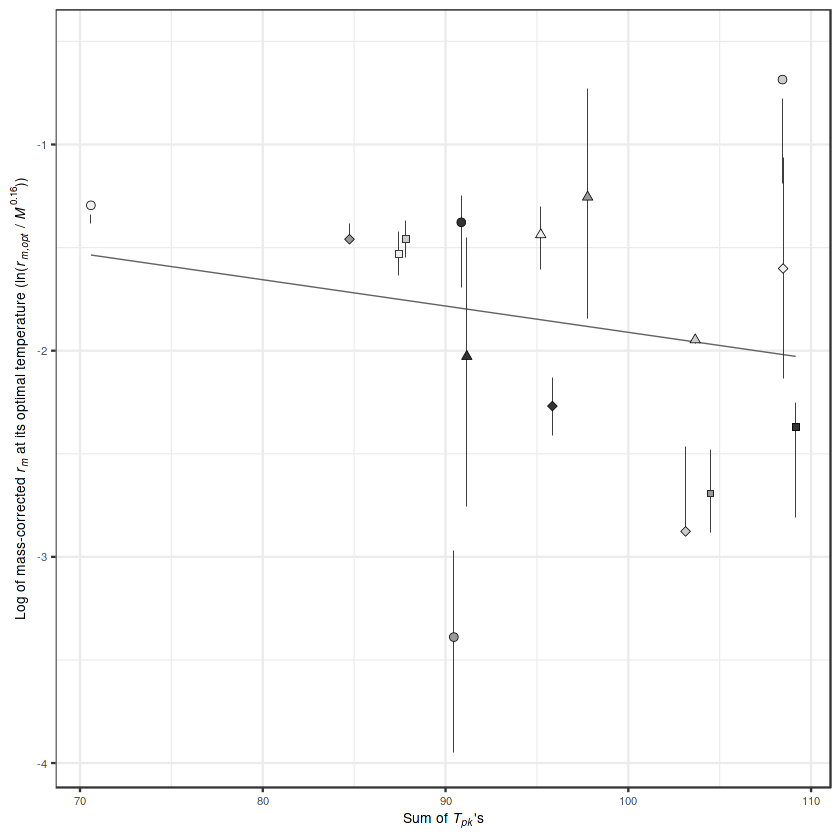

In [27]:
SumTpks_plot <-
  SumPlot %>%
  ggplot(aes(x = sum, y = log(rm_opt/mass^coef(rm_model)[2])))+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill=NA)+
  scale_y_continuous(expression(plain(paste("Log of mass-corrected ",italic(r[m])," at its optimal temperature (ln(",italic(r[paste(m,",", opt)])," / ",italic(M^-0.16),"))"))))+
  scale_x_continuous(expression(plain(paste("Sum of ",italic("T"[pk]),"'s"))))+
  geom_linerange(aes(x=sum, 
                     ymin=log(rm_optLwr/mass^cf[2]), 
                     ymax=log(rm_optUpr/mass^cf[2,2]), colour=species), size=0.2)+
  geom_point(aes(shape=species, 
                 fill=species),
             size=2,
             stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=16,ncol=1,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=1,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text = element_text(size=8),
        legend.position = 'none',
        legend.text = element_text(size = 5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))

SumTpks_plot

In [28]:
#±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±±
#relationship between r_m opt and 1/alpha Tpk

alphaMass <- as_tibble(read_csv('../data/a_pksT_pksMass.csv')) %>% 
  select(species, a_pk, a_pkLwr, a_pkUpr, mass) %>%
  mutate(curve_ID = case_when(species == 'Anoplophora glabripennis' ~ '1',
                              species == 'Halyomorpha halys' ~ '2',       
                              species == 'Aedes aegypti' ~ '3',
                              species == 'Anthonomus grandis' ~ '4',
                              species == 'Paracoccus marginatus' ~ '5',
                              species == 'Acyrthosiphon pisum' ~ '6',
                              species == 'Aphis gossypii' ~ '7',
                              species == 'Bemisia tabaci' ~ '8',
                              species == 'Tetraneura nigriabdominalis' ~ '9',
                              species == 'Stethorus punctillum' ~ '10',
                              species == 'Tetranychus mcdanieli' ~ '11',
                              species == 'Muscidifurax zaraptor' ~ '12',
                              species == 'Aphis nasturtii' ~ '13',
                              species == 'Rhopalosiphum maidis' ~ '14',
                              species == 'Thrips hawaiiensis' ~ '15',
                              species == 'Helicoverpa armigera' ~ '16')) %>%
  filter(curve_ID != 'NA') %>% 
  rename(alphaspecies = species, alphamass = mass, alphacurve = curve_ID ) %>%
  arrange(alphacurve)

alpharm_data <- bind_cols(rm_data, alphaMass) %>% 
                select(-alphaspecies,-alphamass, -alphacurve)

Rows: 45 Columns: 9
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (8): a_pk, a_pkLwr, a_pkUpr, curve_ID, T_pk, T_pkLwr, T_pkUpr, mass

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [29]:
# linear model (note the allometry is linear in log-log scale)
alpharm_model <- lm(log(rm_opt/mass^-0.16) ~ log(a_pk/mass^-0.265), data = alpharm_data)
summary(alpharm_model)
anova(alpharm_model)


Call:
lm(formula = log(rm_opt/mass^-0.16) ~ log(a_pk/mass^-0.265), 
    data = alpharm_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74536 -0.24091  0.00072  0.28304  0.65932 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.2232     0.3404  -0.656 0.522677    
log(a_pk/mass^-0.265)   0.7851     0.1554   5.053 0.000176 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4349 on 14 degrees of freedom
Multiple R-squared:  0.6459,	Adjusted R-squared:  0.6206 
F-statistic: 25.54 on 1 and 14 DF,  p-value: 0.0001762


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
log(a_pk/mass^-0.265),1,4.830369,4.8303692,25.5377,0.0001761807
Residuals,14,2.648052,0.1891466,NA,NA


`geom_smooth()` using formula 'y ~ x'



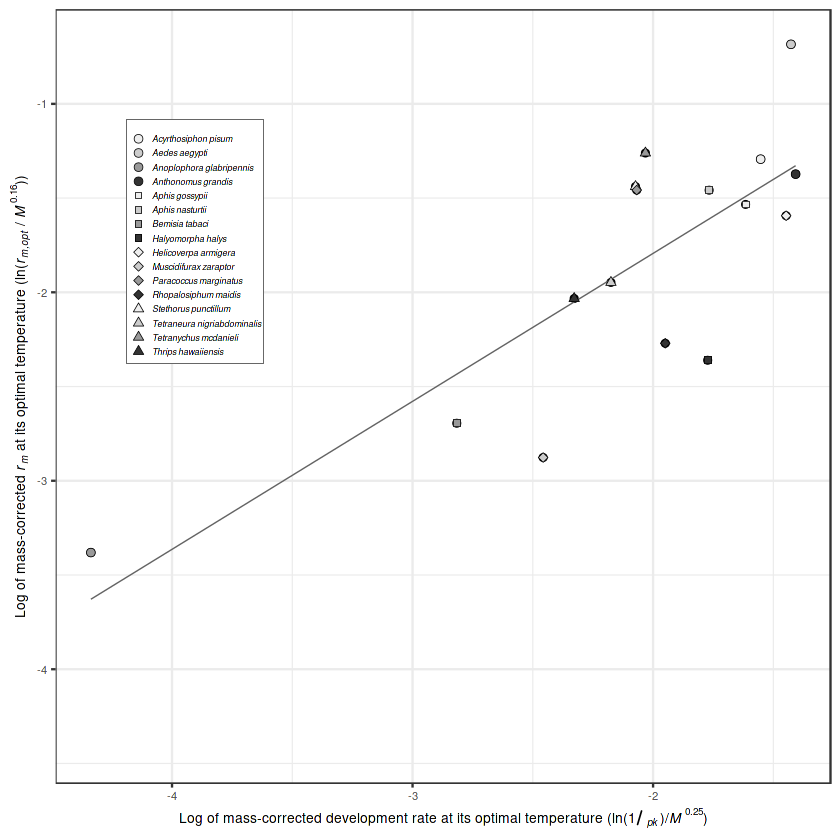

In [30]:
#plot a_pk vs r_opt

alpharm_plot <-
  alpharm_data %>%
  ggplot(aes(x=log(a_pk/mass^-0.265), y = log(rm_opt/mass^-0.16)))+
  geom_point()+
  geom_smooth(method = 'lm', colour = '#636363', size=0.3, fill=NA)+
  scale_y_continuous(expression(plain(paste("Log of mass-corrected ",italic(r[m])," at its optimal temperature (ln(",italic(r[paste(m,",", opt)])," / ",italic(M^-0.16),"))"))))+
  scale_x_continuous(expression(plain(paste("Log of mass-corrected development rate at its optimal temperature (ln(", italic(1/alpha[pk])~")/",italic(M^-0.25),")"))))+
  geom_point(aes(shape=species, 
                 fill=species),
             size=2,
             stroke=0.25)+
  scale_shape_manual(values = c(21,21,21,21,
                                22,22,22,22,
                                23,23,23,23,
                                24,24,24,24),
                     name=expression(bold("")),
                     guide = guide_legend(nrow=16,ncol=1,
                                          direction = "vertical",
                                          title.position = "top",
                                          title.hjust=0.5))+
  scale_fill_manual(values = c("#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333",
                               "#EEEEEE","#CCCCCC","#999999","#333333"),
                    name=expression(bold("")),
                    guide = guide_legend(nrow=16,ncol=1,
                                         direction = "vertical",
                                         title.position = "top",
                                         title.hjust=0.5))+
  scale_colour_manual(values = c("#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333",
                                 "#333333","#333333","#333333","#333333"),
                      name=expression(bold("")),
                      guide = guide_legend(nrow=16,ncol=1,
                                           direction = "vertical",
                                           title.position = "top",
                                           title.hjust=0.5))+
  theme_bw()+
  theme(text = element_text(size=8),
        legend.position = c(0.18, 0.7),
        legend.text = element_text(size = 5, face = 'italic'),
        legend.background = element_rect(colour = "black", size = 0.125), 
        legend.margin=margin(t = 0.05, b = 0.1, r=0.1,l=0.1, unit='cm'),
        legend.key.size = unit(0.3, 'cm'))

alpharm_plot

In [31]:
save_plot(alpharm_plot, file="../results/alpharm_plot.pdf", 
          base_height=11,base_width = 12, base_asp = 0.75,units="cm")

`geom_smooth()` using formula 'y ~ x'



Warning message in log(rm_optLwr/mass^cf[2]):
“NaNs produced”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing missing values (geom_segment).”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

Warning message in log(rm_optLwr/mass^cf[2]):
“NaNs produced”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing missing values (geom_segment).”
`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



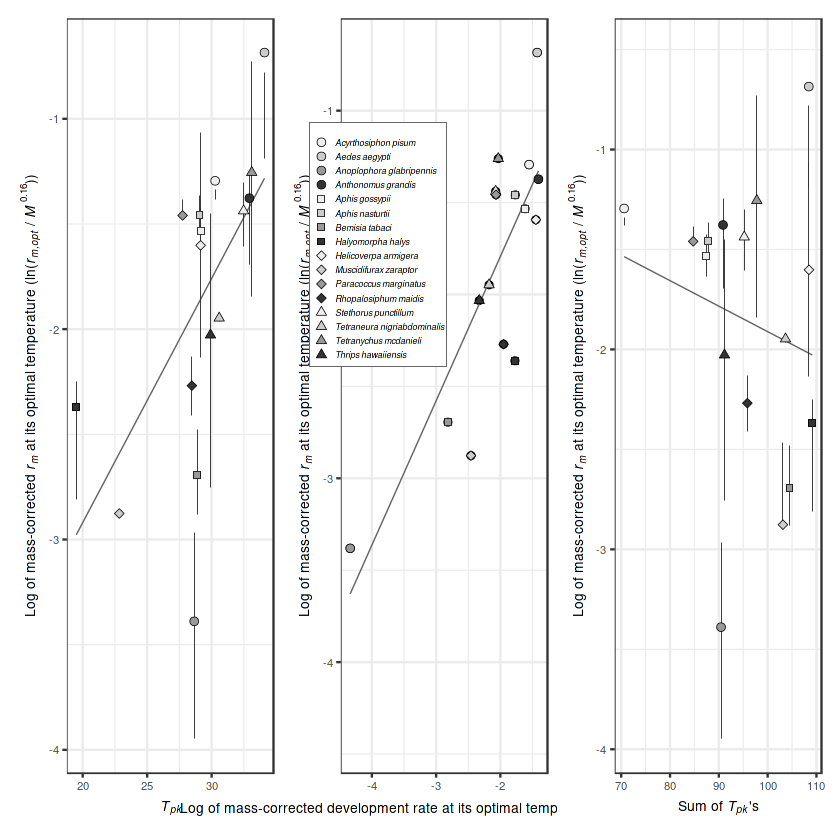

In [32]:
p1 <- MassCorrectedrm_opt + alpharm_plot + SumTpks_plot; p1

save_plot(p1, file="../results/r_mPlots.pdf", 
          base_height=11,base_width = 35, base_asp = 0.75,units="cm")